#**Milestone 4: Presenting Your Findings (Storytelling)**

By: Emer Isau Morales

November 23, 2021

##**Contents**

1. **Questions to Answer / Hypothesis / Approach**
2. **Discuss Technical Challenges**
3. **Detail: Entity Relationship Diagram (ERD)**
4. **Initial Findings**
5. **Deeper Analysis**
6. **Hypotheses Results**
7. **Recommendations**

##**Audience**

External audience, for my classmates.

##1. **Questions to Answer / Hypothesis / Approach**

###**Questions to Answer**

- How many Peruvians won a gold
medal?

- Has Cristiano Ronaldo (CR7) won
any medals?

- Which sporting event gathered
the most athletes?

- In which year were the most gold
medals awarded?

- In the 120 years of the Olympic
Games, which country's team won
the most medals?

- Are there more men or women who have won a gold medal?

- If the dataset only has events up to the year 2016, how do you predict which medal a new athlete will win?

###**Initial Hyphothesis**

- **How many Peruvians won a gold medal?**\
   Of course there are Peruvians who won gold medals

- **Has Cristiano Ronaldo (CR7) won any medals?**\
I think that CR7 has won a gold medal

- **Which sporting event gathered the most athletes?**\
Without a doubt, football is the sporting event that gathers more
athletes

- **In which year were the most gold medals awarded?**\
I believe that more gold medals were awarded between the years
2006 to 2010

- **In the 120 years of the Olympic Games, which country's
team won the most medals?**\
From my perspective, Poland has more medals

- **Are there more men or women who have won a gold medal?**\
There are more male athletes, therefore, I think that men win more medals
- **If the dataset only has events up to the year 2016, how do you predict which medal a new athlete will win?**\
I have no idea what will happen, but we will find out using machine learning later.

###**Data Analysis Approach**

The working environment will be in google
colab with the python programming language
and sqlite will be used to analyze the data.

In the first instance, the files **athlet_events.csv**
and **noc_regions.csv** that are related through
the NOC column will be loaded. That is, the
column exists in both files. Then it will be necessary to remove or replace
the NA values for better analysis.

Finally, to answer the questions posed,
statistical inference and graphic visualization
will be used to determine if there is a
relationship between the columns.

##2. **Discuss Technical Challenges**

- Google Colab with Python and SQLite was used for all analyzes.

- Various python software packages were used such as **pandas**, **sqlite3**, **numpy**, **matplotlib**, **sklearn**, etc.

- The sqlite3 package gave no results when it was used to calculate the SUM of the NA values. Therefore, another software called DB Browser for SQLite was used to perform the calculation

##3. **Detail: Entity Relationship Diagram (ERD)**
<img src="https://raw.githubusercontent.com/Emermv/sql-for-data-science/master/olympics-erd.png">

##4. **Initial Findings**

###**Creating a olympics database**
Sqlite is a lightweight database that can be started as an empty text file. You can create the file with touch **olympics.db** or with this equivalent Python code:

In [1]:
from pathlib import Path
import os

db_name='olympics.db'
if os.path.exists(db_name):
  os.remove(db_name)
  
Path(db_name).touch()

###**Creating regions table**


In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('olympics.db')
cursor = conn.cursor()

cursor.execute('''create table regions(
 NOC    varchar(45),
 region varchar(150),
 notes text
  ) ''')

pd.read_sql("pragma table_info('regions')",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,NOC,varchar(45),0,None,0
1,1,region,varchar(150),0,None,0
2,2,notes,text,0,None,0


In [3]:
cursor.execute('''create table athletes(
  ID int,
  Name varchar(250),
  Sex char(1),
  Age float,
  Height  float,
 Weight float,
 Team    varchar(100),
 NOC    varchar(45),
Games   varchar(100), 
Year  int,
Season  varchar(45), 
City  varchar(100), 
Sport varchar(100),
Event varchar(100), 
 Medal varchar(45),
 foreign key(NOC) references regions(NOC)
  ) ''')

pd.read_sql("pragma table_info('athletes')",conn)

,cid,name,type,notnull,dflt_value,pk
0,0,ID,int,0,None,0
1,1,Name,varchar(250),0,None,0
2,2,Sex,char(1),0,None,0
3,3,Age,float,0,None,0
4,4,Height,float,0,None,0
5,5,Weight,float,0,None,0
6,6,Team,varchar(100),0,None,0
7,7,NOC,varchar(45),0,None,0
8,8,Games,varchar(100),0,None,0
9,9,Year,int,0,None,0


###**Import data**

In [7]:
url = 'https://raw.githubusercontent.com/Emermv/sql-for-data-science/master/athlete_events.csv'
athlete_events = pd.read_csv(url)
athlete_events.info()
athlete_events.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [8]:
regions_url = 'https://raw.githubusercontent.com/Emermv/sql-for-data-science/master/noc_regions.csv'
regions = pd.read_csv(regions_url)
regions.info()
regions.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


###**Write the data to a sqlite table**

In [9]:
regions.to_sql('regions', conn, if_exists='append', index = False)

In [10]:
athlete_events.to_sql('athletes', conn, if_exists='append', index = False)

###**Preview data**

In [32]:
pd.read_sql("select * from regions limit 5",conn)

,NOC,region,notes
0,AFG,Afghanistan,None
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,None
3,ALG,Algeria,None
4,AND,Andorra,None


In [31]:
pd.read_sql("select * from athletes  limit 5",conn)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


###**Descriptive statistics**
Descriptive statistical analyzes were carried out on some of the variables for a better understanding of the distributions. Some of the variables include:

- Age
- Height
- Weight

In [18]:
descriptive_statistical=pd.read_sql("""select 
round(Age,0) as Age,
round(Height,0) as Height,
round(Weight,0) as Weight
from athletes where
Age is not null
and Height is not null
and Weight is not null""",conn)
descriptive_statistical.describe()

,Age,Height,Weight
count,206165.000000,206165.000000,206165.000000
mean,25.055509,175.371950,70.690670
std,5.483096,10.546088,14.341004
min,11.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,71.000000,226.000000,214.000000


###**Initial findings summary**
I have rejected the following initial hypotheses:
I thought that the country with the most medals was Poland. However, after carefully analyzing the data, I discovered that it was USA.
I also thought that CR7 had won a gold medal, but it is not true.

The next thing I am planning to do is analyze my data extensively to validate my hypotheses. For this I will use descriptive statistics techniques such as: tables, graphs, measures of central tendency, dispersion, etc.

Additionally I will build a machine learning model to predict which medals will be won the most in future events of the olympic games

##5. **Deeper Analysis**

###**How many Peruvians won a gold medal?**
Only one Peruvian has won a gold medal

In [20]:
pd.read_sql('''SELECT * FROM athletes where NOC='PER' and Medal='Gold' ''', conn)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,125468,Edwin Gonzalo Vsquez Cam,M,25.0,None,None,Peru,PER,1948 Summer,1948,Summer,London,Shooting,"Shooting Men's Free Pistol, 50 metres",Gold


###**Has Cristiano Ronaldo (CR7) won any medals?**
No, CR7 has not won a gold medal at the olympic games

In [21]:
pd.read_sql('''SELECT * FROM athletes where NOC='POR' and Name like '%cristiano%' ''', conn)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,23835,Cristiano Ronaldo dos Santos Aveiro,M,19.0,186.0,80.0,Portugal,POR,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,None


###**Which sporting event gathered the most athletes?**
Football has more athletes

Text(0, 0.5, 'Athletes Count')

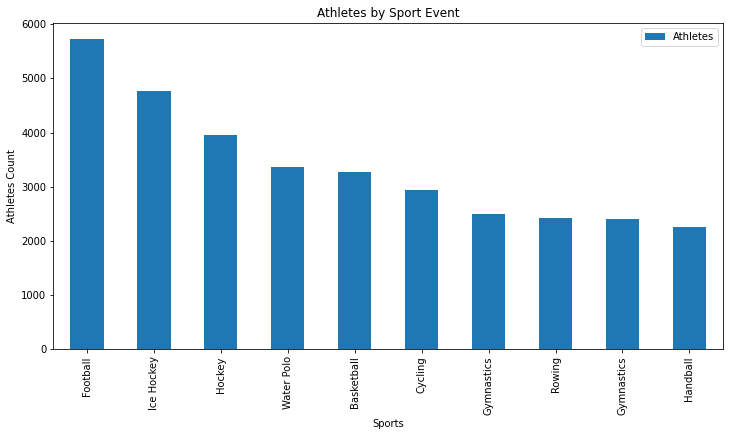

In [29]:
import matplotlib.pyplot as plt
athletes_by_event=pd.read_sql('''
              SELECT 
                Sport,
                Event,
                count(Id) as athletes_count
              FROM athletes  group by Event 
              order by athletes_count desc limit 10 ''', conn)

athletes_by_event_series={'Athletes':[]}
columns=[]
for row in athletes_by_event.iterrows():
  sport=row[1]['Sport']
  columns.append(sport)
  athletes_by_event_series['Athletes'].append(row[1]['athletes_count'])

plotdata = pd.DataFrame(athletes_by_event_series, 
    index=columns
)
plt.rcParams["figure.figsize"] = (12,6)
plotdata.plot(kind="bar")
plt.title("Athletes by Sport Event")
plt.xlabel("Sports")
plt.ylabel("Athletes Count")


###**In which year were the most gold medals awarded?**
In 2008, more gold medals were awarded

Text(0, 0.5, 'Medals')

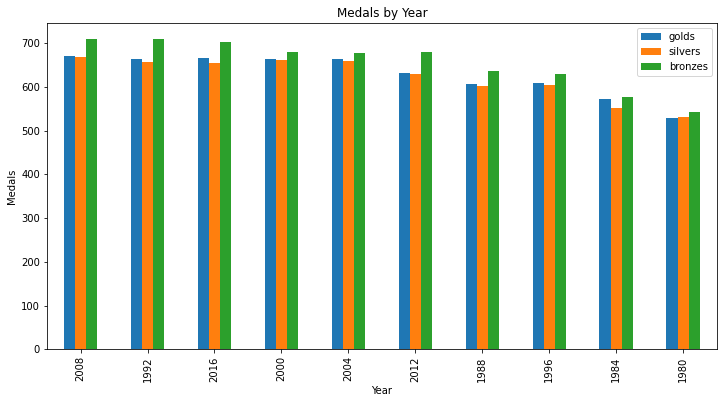

In [30]:
medals_by_year=pd.read_sql("""
select 
a.Year,
(select count(Id) from athletes where  Medal='Gold' and Year=a.Year) as Gold_medals,
(select count(Id) from athletes where  Medal='Silver' and Year=a.Year) as Silver_medals,
(select count(Id) from athletes where  Medal='Bronze' and Year=a.Year) as Bronze_medals,
count(Medal) as Medal_count
from athletes as a
where a.Medal is not null
group by a.Year
order by Medal_count desc
limit 10
""",conn)
series={'golds':[],'silvers':[],'bronzes':[]}
columns=[]
for row in medals_by_year.iterrows():
  year=row[1]['Year']
  columns.append(year)
  series['golds'].append(row[1]['Gold_medals'])
  series['silvers'].append(row[1]['Silver_medals'])
  series['bronzes'].append(row[1]['Bronze_medals'])

plotdata = pd.DataFrame(series, 
    index=columns
)
plt.rcParams["figure.figsize"] = (12,6)
plotdata.plot(kind="bar")
plt.title("Medals by Year")
plt.xlabel("Year")
plt.ylabel("Medals")

###**In the 120 years of the Olympic Games, which country's team won the most medals?**
USA has more medals

Text(0, 0.5, 'Medals')

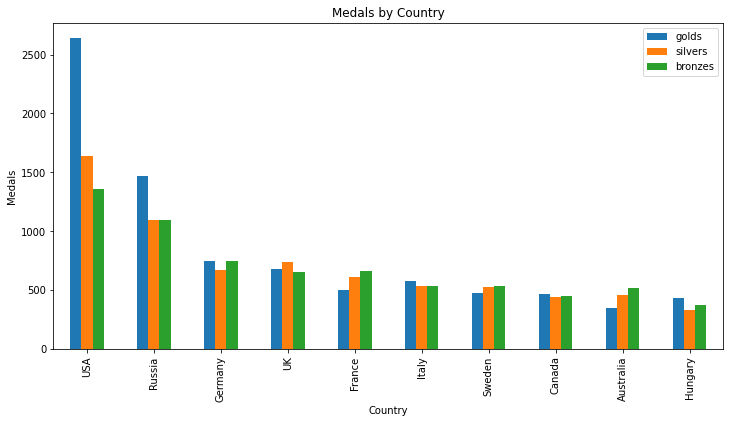

In [33]:
sql_update_query = """update regions set NOC='RUS' where NOC='URS'"""
cursor.execute(sql_update_query)
conn.commit()

sql_update_query = """update athletes set NOC='RUS' where NOC='URS'"""
cursor.execute(sql_update_query)
conn.commit()

medals_by_country=pd.read_sql("""
select 
a.NOC,
r.region,
(select count(Id) from athletes where  Medal='Gold' and NOC=a.NOC) as Gold_medals,
(select count(Id) from athletes where  Medal='Silver' and NOC=a.NOC) as Silver_medals,
(select count(Id) from athletes where  Medal='Bronze' and NOC=a.NOC) as Bronze_medals,
((select count(Id) from athletes where  Medal='Gold' and NOC=a.NOC)+
(select count(Id) from athletes where  Medal='Silver' and NOC=a.NOC)+
(select count(Id) from athletes where  Medal='Bronze' and NOC=a.NOC))as Medals
from athletes as a
left join regions as r on r.NOC=a.NOC
where a.Medal in ('Gold','Silver','Bronze')
group by a.NOC
order by Medals desc
limit 10
""",conn)

series={'golds':[],'silvers':[],'bronzes':[]}
columns=[]
for row in medals_by_country.iterrows():
  region=row[1]['region']
  columns.append(region)
  series['golds'].append(row[1]['Gold_medals'])
  series['silvers'].append(row[1]['Silver_medals'])
  series['bronzes'].append(row[1]['Bronze_medals'])

plotdata = pd.DataFrame(series, 
    index=columns
)
plt.rcParams["figure.figsize"] = (12,6)
plotdata.plot(kind="bar")
plt.title("Medals by Country")
plt.xlabel("Country")
plt.ylabel("Medals")

###**Are there more men or women who have won a gold medal?**
Like I said, there are more men with gold medals

In [35]:
pd.read_sql("""
select 
count(*) as medals,
'M' as gender 
from athletes 
where Medal='Gold' 
and Sex='M'
union 
select 
count(*) as medals,
'F' as gender 
from athletes 
where Medal='Gold' 
and Sex='F' """,conn)


,medals,gender
0,3747,F
1,9625,M


###**If the dataset only has events up to the year 2016, how do you predict which medal a new athlete will win?**

To answer this question I will use Logistic Regression. I will create a model that can predict whether an athlete will win a gold, silver or bronze medal.

####**[Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** 
Logistic Regression is a Supervised Algorithm and is used for classification.

I will use these 4 columns:
- Age
- Height
- Weight
- Medal (Gold: 1, Silver: 2, Bronze: 3, None: 4)

A sample must be drawn from each type of medal so that the model can predict well

In [283]:
length=20000
golds=pd.read_sql("""
select 
(case Sex when 'M' then 1 else 0 end) as Sex,
Year,
round(Age,0) as Age,
round(Height,0) as Height,
round(Weight,0) as Weight,
1 as Medal 
from athletes
where Age is not null
and Height is not null
and Weight is not null
and Medal='Gold'
ORDER BY RANDOM() 
limit {}
""".format(length),conn)

silvers=pd.read_sql("""
select 
(case Sex when 'M' then 1 else 0 end) as Sex,
Year,
round(Age,0) as Age,
round(Height,0) as Height,
round(Weight,0) as Weight,
2 as Medal 
from athletes
where Age is not null
and Height is not null
and Weight is not null
and Medal='Silver'
ORDER BY RANDOM() 
limit {}
""".format(length),conn)

bronzes=pd.read_sql("""
select 
(case Sex when 'M' then 1 else 0 end) as Sex,
Year,
round(Age,0) as Age,
round(Height,0) as Height,
round(Weight,0) as Weight,
3 as Medal 
from athletes
where Age is not null
and Height is not null
and Weight is not null
and Medal='Bronze'
ORDER BY RANDOM() 
limit {}
""".format(length),conn)

no_medals=pd.read_sql("""
select 
(case Sex when 'M' then 1 else 0 end) as Sex,
Year,
round(Age,0) as Age,
round(Height,0) as Height,
round(Weight,0) as Weight,
4 as Medal 
from athletes
where Age is not null
and Height is not null
and Weight is not null
and Medal is null
ORDER BY RANDOM() 
limit 1000
""",conn)
data_train=pd.concat([golds,silvers,bronzes,no_medals])
#data_train[['Age', 'Height', 'Weight','Medal']] = data_train[['Age', 'Height', 'Weight','Medal']].astype(int)
#print(data_train.dtypes)
data_train.describe()

,Sex,Year,Age,Height,Weight,Medal
count,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000,31181.000000
mean,0.657804,1988.079728,25.421346,177.543472,73.610660,2.063532
std,0.474452,22.605889,5.063511,10.930702,14.998293,0.880790
min,0.000000,1896.000000,13.000000,136.000000,28.000000,1.000000
25%,0.000000,1976.000000,22.000000,170.000000,63.000000,1.000000
50%,1.000000,1992.000000,25.000000,178.000000,73.000000,2.000000
75%,1.000000,2006.000000,28.000000,185.000000,83.000000,3.000000
max,1.000000,2016.000000,66.000000,223.000000,182.000000,4.000000


Then we will analyze how many results we have of each type using the groupby function




In [284]:
print(data_train.groupby('Medal').size())

Medal
1    10167
2     9866
3    10148
4     1000
dtype: int64


####**Data visualization**
Before starting to process the data set, I made some visualizations that can often help to better understand the characteristics of the information we are working with and their correlation.

First I visualized in history format the four input Features with names "Age", "Height", "Wight" and "Medal". We can see graphically between which values ​​their minimums and maximums are understood and in which intervals they concentrate the greatest density of records. .

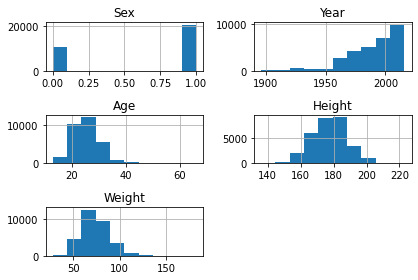

In [285]:
data_train.drop(['Medal'],1).hist()
plt.tight_layout()
plt.show()

And we can also interrelate the inputs in pairs, to see how the outputs of medals by colors are linearly concentrated

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


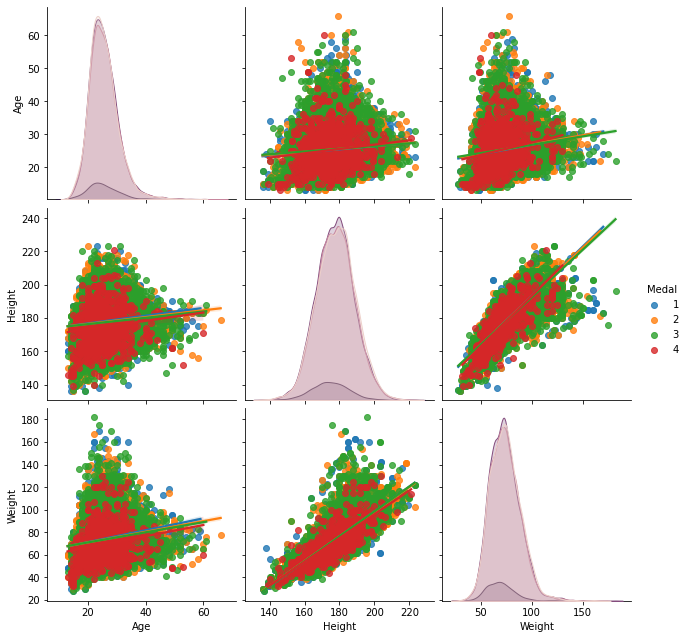

In [299]:
#import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
df=data_train
df.reset_index(inplace=True)
sb.pairplot(df.dropna(), hue='Medal',size=3,vars=["Age","Height","Weight"],kind='reg')

####**We create the Logistic Regression Model**
Now we load the variables of the 4 input columns in X excluding the column "Medal" with the `drop()` method. Instead we add the column "Medal" in the variable y. We run X.shape to check the dimension of our matrix with input data of 4000 records by 3 columns.

In [287]:
X = np.array(data_train.drop(['Medal'],1))
y = np.array(data_train['Medal'])
X.shape

(31181, 5)

And we create our model and make it fit (fit) to our set of inputs X and outputs 'y'

In [288]:
model = linear_model.LogisticRegression(max_iter=1000*1000,penalty='none')
#model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(max_iter=1000000, penalty='none')

Once our model is compiled, we make it classify our entire set of X inputs using the "predict (X)" method and we review some of its outputs and see that it matches the actual outputs of the data.

In [289]:
predictions = model.predict(X)
print(predictions[0:5])

[1 3 3 3 3]


And we confirm how good our model was using model.score () which returns the average precision of the predictions, in our case 34%.

In [290]:
model.score(X,y)

0.3370963086494981

####**Validation of our model**
A good practice in Machine Learning is to subdivide our input data set into a training set and another to validate the model (which is not used during training and therefore the machine is unknown). This will avoid problems in which our algorithm can fail by "overgeneralizing" the knowledge.

To do this, we subdivide our input data randomly (mixed) using 80% of records for training and 20% for validation.

In [291]:
validation_size = 0.20
seed = 457
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,y, test_size=validation_size, random_state=seed)

We recompile our Logistic Regression model but this time with only 80% of the input data and we calculate the new scoring that now gives us 34%.

In [292]:
name='Logistic Regression'
#kfold = model_selection.KFold(n_splits=3, random_state=seed,shuffle=True)
kfold = model_selection.KFold(random_state=848, shuffle=True)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.335031 (0.004490)


And now we make the predictions - actually classification - using our "cross validation set", that is, the subset that we had set aside. In this case we see that the hits were 34%.

In [293]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.33702100368767035


####**Classification (or prediction) of new values ​​**

In [297]:
data_test=pd.read_sql("""select
(case Sex when 'M' then 1 else 0 end) as Sex,
Year,
Age,
Height,
Weight,
(case Medal when 'Gold' then 1 when 'Silver' then 2  when 'Bronze' then 3 else 4 end) as Medal 
from athletes
where 
 Age is not null
and Height is not null
and Weight is not null
limit 10112,1
""",conn)
#data_test.describe()
print(data_test)
model.predict(data_test.drop(['Medal'],1))

   Sex  Year   Age  Height  Weight  Medal
0    0  1992  27.0   157.0    51.0      3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([3])

####**Experiment**

In [298]:
new_data=pd.DataFrame({'Sex':[0],'Year':[2021],'Age':[28],'Height':[190],'Weight':[50]})
print(new_data)
model.predict(new_data)

   Sex  Year  Age  Height  Weight
0    0  2021   28     190      50


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([1])

##**6. Hypotheses Results**

- **How many Peruvians won a gold
medal?**\
Only one Peruvian has won a gold medal
-  **Has Cristiano Ronaldo (CR7) won
any medals?**\
No, CR7 has not won a gold medal at the olympic games

-  **Which sporting event gathered
the most athletes?**\
Football has more athletes
-  **In which year were the most gold
medals awarded?**\
In 2008, more gold medals were awarded

-  **In the 120 years of the Olympic
Games, which country's team won
the most medals?**\
USA has more medals

-  **Are there more men or women who have won a gold medal?**\
Like I said, there are more men with gold medals

-  **If the dataset only has events up to the year 2016, how do you predict which medal a new athlete will win?**\
A machine learning model has been created to predict new data from training with existing data. It is observed that the model is capable of predicting when new values ​​are introduced

##**7. Recommendations**
Positive, linear and strong correlation between height and weight.
The Weight variable is a significant predictor of the Height variable.
The observed studies lack experimental design principles.
Therefore, the findings on the data cannot infer causality.
Observational studies can only infer correlation